<a href="https://colab.research.google.com/github/mflagosv25/Talento-Tech/blob/main/Ejercicios%20y%20Tareas/Metricas_desempe%C3%B1o_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=2, noise=0.1)


df = pd.DataFrame(X, columns=['Característica 1', 'Característica 2'])
df['Predicción'] = y

# Calculamos matriz de correlación
corr_matrix = df.corr()

print(corr_matrix)

                  Característica 1  Característica 2  Predicción
Característica 1          1.000000          0.023823    0.703053
Característica 2          0.023823          1.000000    0.727684
Predicción                0.703053          0.727684    1.000000


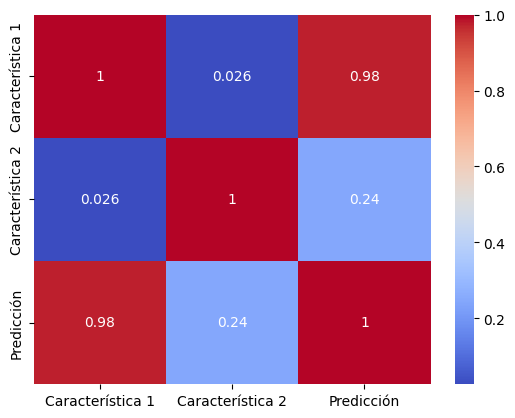

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Gráfica de la matriz de correlación
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

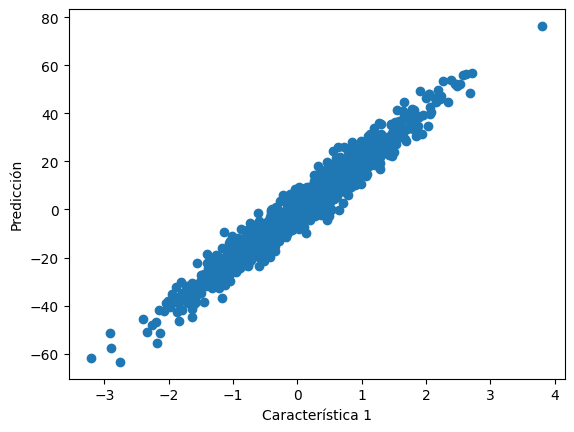

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Característica 1'], df['Predicción'])
plt.xlabel('Característica 1')
plt.ylabel('Predicción')
plt.show()

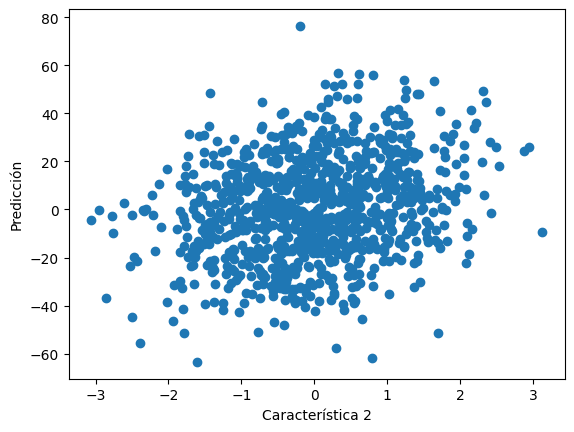

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Característica 2'], df['Predicción'])
plt.xlabel('Característica 2')
plt.ylabel('Predicción')
plt.show()

In [ ]:
# Regresión Lineal Simple
x = [1,2,2,3,4,4,5,6]
y = [2,3,4,4,4,6,5,7]
dic_rl = {'x':x,'y':y}
df_rl = pd.DataFrame(dic_rl)
df_rl['x*y'] = df_rl['x']*df_rl['y']
df_rl['x^2'] = df_rl['x']**2
s_total = df_rl.sum()
#Agragamos la fila de totales al df
df_rl.loc[-1] = s_total
df_rl.index = df_rl.index+1
df_rl.reset_index(drop = True,inplace = True)
df_rl

,x,y,x*y,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
8,27,35,135,111


In [ ]:
#Cálculo de la pendiente
n = len(df_rl)-1
sum_x = df_rl['x'].iloc[-1]
sum_y = df_rl['y'].iloc[-1]
sum_xy = df_rl['x*y'].iloc[-1]
sum_x2 = df_rl['x^2'].iloc[-1]
m = (n*sum_xy-sum_x*sum_y)/(n*sum_x2-sum_x**2)
#Calculo del intercepto
x_prom = sum_x/n
y_prom = sum_y/n
b = y_prom-m*x_prom
print(f'm = {m}')
print(f'b = {b}')

m = 0.8490566037735849
b = 1.5094339622641506


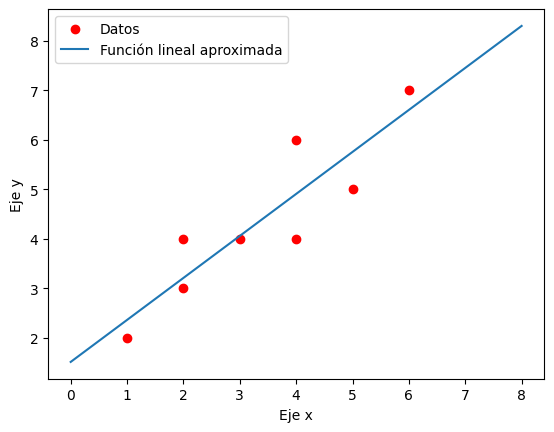

In [ ]:
import matplotlib.pyplot as plt
#Creamos puntos para la función lineal obtenida
x = np.linspace(0, 8, 10)
y = m*x + b
#Gráfica de los datos
plt.scatter(df_rl['x'].iloc[0:-1], df_rl['y'].iloc[0:-1],color='red', label = 'Datos')
#Gráfica de la Función lineal
plt.plot(x, y, label = 'Función lineal aproximada')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend()
plt.show()

In [ ]:
df_rl['Sr_i']=(df_rl['y']-(m*df_rl['x']+b))**2
Sr = sum(df_rl['Sr_i'].iloc[0:-1])
round(Sr,3)

3.547

In [ ]:
y = [78.5,74.3,104.3,87.6,95.9,109.2,102.7,72.5,93.1,115.9,83.8,113.3,109.4]
x1 = [7,1,11,11,7,11,3,1,2,21,1,11,10]
x2 = [26,29,56,31,52,55,71,31,54,47,40,66,68]
x3 = [6,15,8,8,6,9,17,22,18,4,23,9,8]
x4 = [60,52,20,47,33,22,6,44,22,26,34,12,12]
ones = [1,1,1,1,1,1,1,1,1,1,1,1,1]
dicX = {'ones': ones,'x1':x1,'x2':x2,'x3':x3,'x4':x4}
df = pd.DataFrame(dicX)
df
#XTX = (df.T)*(df)
#XTX






,ones,x1,x2,x3,x4
0,1,7,26,6,60
1,1,1,29,15,52
2,1,11,56,8,20
3,1,11,31,8,47
4,1,7,52,6,33
5,1,11,55,9,22
6,1,3,71,17,6
7,1,1,31,22,44
8,1,2,54,18,22
9,1,21,47,4,26
